# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pprint as pprint
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

np.random.seed(seed=42)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = time.ctime(city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | walvis bay
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | saint-francois
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | sandnessjoen
Processing Record 8 of Set 1 | tokar
Processing Record 9 of Set 1 | laojunmiao
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | dudinka
Processing Record 12 of Set 1 | klyuchi
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | tolanaro
Processing Record 16 of Set 1 | colonia
Processing Record 17 of Set 1 | puerto baquerizo moreno
Processing Record 18 of Set 1 | ulladulla
Processing Record 19 of Set 1 | ocean pointe
City not found. Skipping...
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | punta del este
Processing

In [49]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [50]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,walvis bay,-22.9575,14.5053,15.61,84,78,1.16,NA,Sun Nov 26 20:57:50 2023
1,olonkinbyen,70.9221,-8.7187,1.46,85,100,8.31,SJ,Sun Nov 26 20:57:50 2023
2,bethel,41.3712,-73.4140,10.67,87,100,6.69,US,Sun Nov 26 20:55:33 2023
3,saint-francois,46.4154,3.9054,0.92,94,100,0.51,FR,Sun Nov 26 20:57:50 2023
4,grytviken,-54.2811,-36.5092,1.97,94,45,4.59,GS,Sun Nov 26 20:57:51 2023


In [51]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [52]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,walvis bay,-22.9575,14.5053,15.61,84,78,1.16,NaN,Sun Nov 26 20:57:50 2023
1,olonkinbyen,70.9221,-8.7187,1.46,85,100,8.31,SJ,Sun Nov 26 20:57:50 2023
2,bethel,41.3712,-73.4140,10.67,87,100,6.69,US,Sun Nov 26 20:55:33 2023
3,saint-francois,46.4154,3.9054,0.92,94,100,0.51,FR,Sun Nov 26 20:57:50 2023
4,grytviken,-54.2811,-36.5092,1.97,94,45,4.59,GS,Sun Nov 26 20:57:51 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

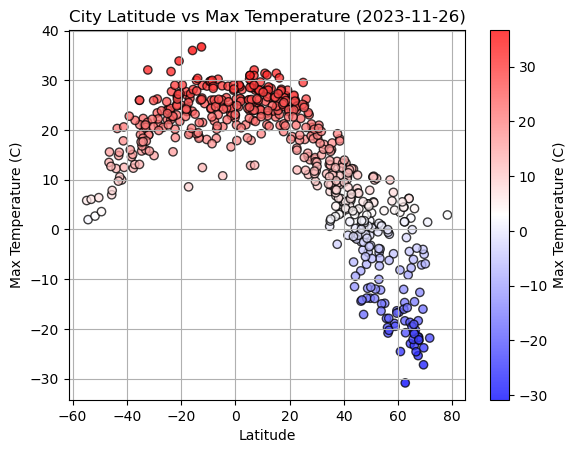

In [53]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
color_values = city_data_df["Max Temp"] 

fig1 = plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75, c=color_values, cmap='bwr')
plt.colorbar(fig1, label='Max Temperature (C)')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2023-11-26)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

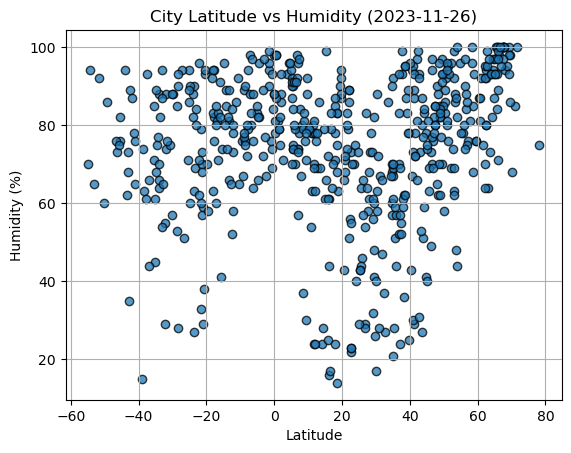

In [54]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

fig2 = plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2023-11-26)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

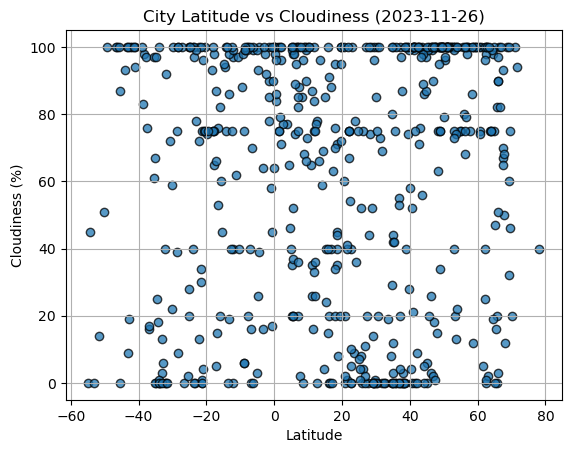

In [55]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
fig3 = plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2023-11-26)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

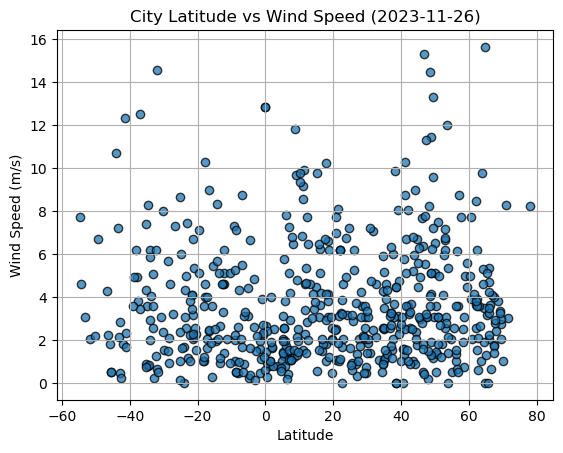

In [56]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
fig4 = plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-11-26)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
# plt.scatter(x_axis,y_axis)
# plt.plot(x_axis,regress_values,"r-")
# plt.annotate(line_eq,(-40,15), fontsize=15,color="red")
# print(f"The r value is {rvalue}")

In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,1.46,85,100,8.31,SJ,Sun Nov 26 20:57:50 2023
2,bethel,41.3712,-73.4140,10.67,87,100,6.69,US,Sun Nov 26 20:55:33 2023
3,saint-francois,46.4154,3.9054,0.92,94,100,0.51,FR,Sun Nov 26 20:57:50 2023
6,sandnessjoen,66.0217,12.6316,-20.71,71,3,5.35,NO,Sun Nov 26 20:53:03 2023
7,tokar,18.4254,37.7290,26.93,75,35,4.12,SD,Sun Nov 26 20:57:51 2023


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,walvis bay,-22.9575,14.5053,15.61,84,78,1.16,NaN,Sun Nov 26 20:57:50 2023
4,grytviken,-54.2811,-36.5092,1.97,94,45,4.59,GS,Sun Nov 26 20:57:51 2023
5,port elizabeth,-33.9180,25.5701,19.62,88,0,6.17,ZA,Sun Nov 26 20:55:46 2023
12,waitangi,-43.9535,-176.5597,12.24,94,93,10.69,NZ,Sun Nov 26 20:57:52 2023
13,puerto natales,-51.7236,-72.4875,2.68,92,14,2.03,CL,Sun Nov 26 20:57:52 2023


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.8832258148164689


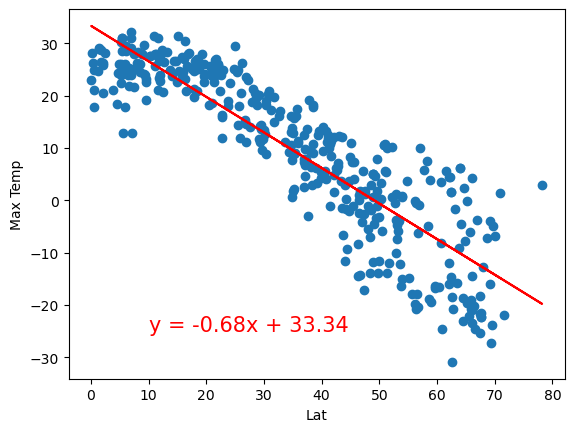

In [64]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
plt.xlabel(x_axis.name)
plt.ylabel(y_axis.name)

print(f"The r value is {rvalue}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,-25), fontsize=15,color="red")
plt.show()

The r value is 0.6331707865401641


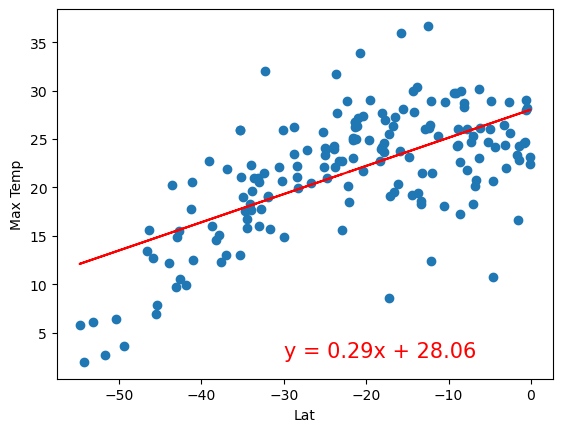

In [68]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
plt.xlabel(x_axis.name)
plt.ylabel(y_axis.name)

print(f"The r value is {rvalue}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,2.5), fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** Both hemisphere scatter plots show that the further from the equator, the lower the temperature. The closer to the equator, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.25967362728392096


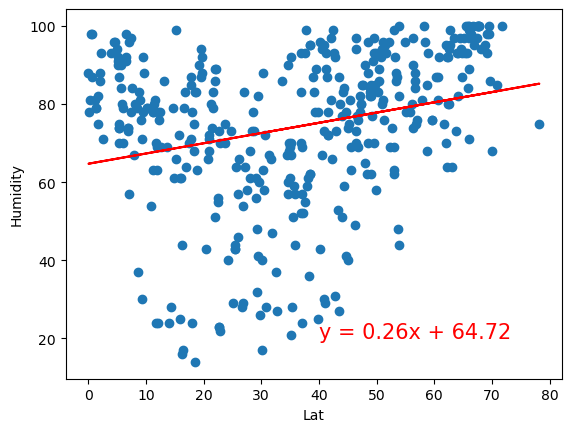

In [70]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
plt.xlabel(x_axis.name)
plt.ylabel(y_axis.name)

print(f"The r value is {rvalue}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,20), fontsize=15,color="red")
plt.show()


The r value is 0.23737735390950215


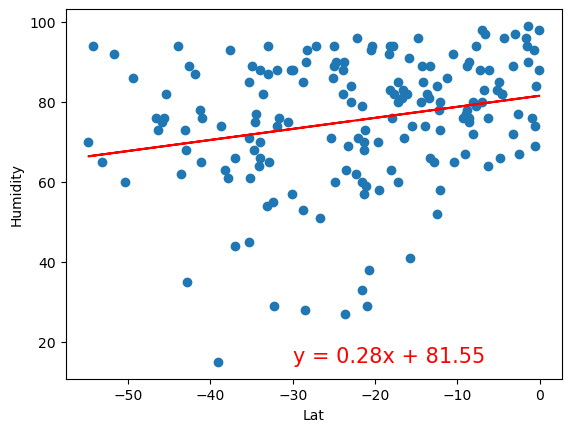

In [74]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
plt.xlabel(x_axis.name)
plt.ylabel(y_axis.name)

print(f"The r value is {rvalue}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,15), fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** Because you can have dry or humid citites on either side of the equator, these scatter plots show pretty similar results based on our sample data. This is because any given handful of cities both North or South of the equator will have both more humid and less humid cities. 

There is no obvious correlation here.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.09423793437922456


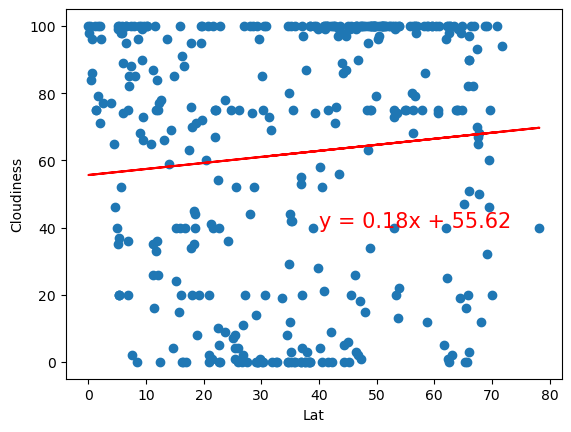

In [77]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
plt.xlabel(x_axis.name)
plt.ylabel(y_axis.name)

print(f"The r value is {rvalue}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,40), fontsize=15,color="red")
plt.show()

The r value is 0.14159707169927216


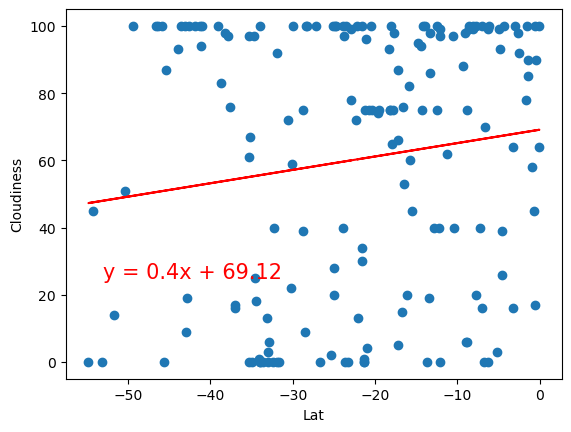

In [79]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
plt.xlabel(x_axis.name)
plt.ylabel(y_axis.name)

print(f"The r value is {rvalue}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-53,25), fontsize=15,color="red")
plt.show()


**Discussion about the linear relationship:** For similar reasons to humidity, there is no real correlation. There might be slightly more clouds near the equator in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.07837992764022117


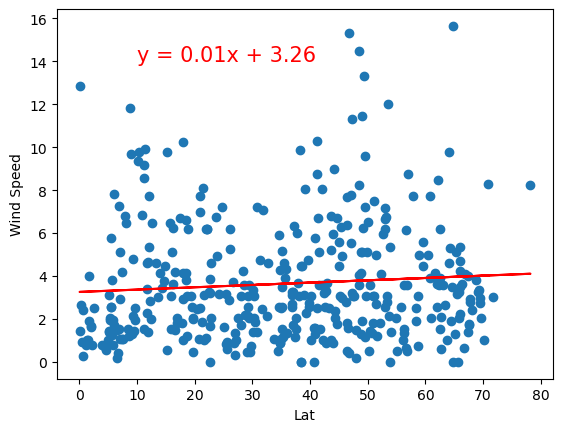

In [85]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
plt.xlabel(x_axis.name)
plt.ylabel(y_axis.name)

print(f"The r value is {rvalue}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,14), fontsize=15,color="red")
plt.show()

The r value is -0.13621207926860965


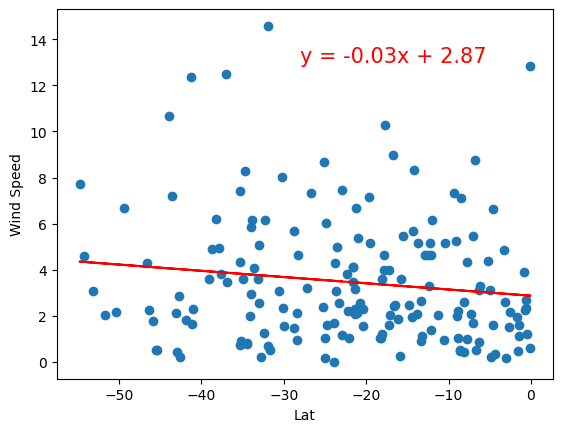

In [89]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
plt.xlabel(x_axis.name)
plt.ylabel(y_axis.name)

print(f"The r value is {rvalue}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-28,13), fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** There does not seem to be much correlation in wind speed either. Wind speed might slightly decrerase the closer to the equator in each hemisphere.